In [5]:
!pip install yfinance==0.1.74

In [6]:
!pip install python-dotenv

# Step 1: Importing necessary  

In [7]:
!pip install mplcyberpunk


In [8]:
import pandas as pd
import datetime #datas
import yfinance as yf #download quotes
from matplotlib import pyplot as plt #python graths
import mplcyberpunk #grafic's style
import smtplib #email sending
from email.message import EmailMessage

# Step 2: Geeting data from Yahoo Finance

In [121]:
active = ['ARZZ3.SA', 'BRL=X', 'CCRO3.SA', 'CPFE3.SA', 'EGIE3.SA', 'HYPE3.SA', 'LEVE3.SA', 'LREN3.SA', 
           'ODPV3.SA', 'PARD3.SA', 'PRIO3.SA', 'SUZB3.SA', 'TOTS3.SA', 'VALE3.SA', 'VULC3.SA', 'WEGE3.SA', 
           '^BVSP']

today = datetime.datetime.now()
one_year_ago = today - datetime.timedelta(days = 365)

stock_data = yf.download(active, one_year_ago, today)

# print(hoje)
# print(one_year_ago)
display(stock_data['Adj Close'])

[*********************100%***********************]  17 of 17 completed


,ARZZ3.SA,BRL=X,CCRO3.SA,CPFE3.SA,EGIE3.SA,HYPE3.SA,LEVE3.SA,LREN3.SA,ODPV3.SA,PARD3.SA,PRIO3.SA,SUZB3.SA,TOTS3.SA,VALE3.SA,VULC3.SA,WEGE3.SA,^BVSP
Date,,,,,,,,,,,,,,,,,
2022-04-05,91.357719,4.5938,13.283503,30.122169,41.288628,37.916870,21.538298,27.055481,10.696495,19.033239,24.049999,51.500523,36.595531,88.180077,9.985526,34.055870,118885.0
2022-04-06,90.567215,4.6507,13.118308,30.267818,41.506588,37.683842,20.826075,26.174919,10.803072,18.176062,23.549999,52.612865,35.685837,89.515160,9.666839,33.760845,118228.0
2022-04-07,92.216553,4.7152,13.176613,30.449881,41.610825,37.499352,20.877560,25.952362,10.909651,18.253984,23.559999,51.785740,35.310089,90.052895,9.647524,33.554325,118862.0
2022-04-08,90.489136,4.7521,13.225198,30.804901,41.667683,37.790646,20.774588,25.865273,10.683689,17.922806,23.580000,51.814259,35.329868,88.217171,9.618552,33.573990,118322.0
2022-04-11,86.917191,4.6981,13.118308,30.841314,41.715065,38.159618,20.216822,25.884626,10.537336,17.153294,23.350000,51.519535,35.053005,87.150955,9.521980,32.010353,116953.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-29,64.290001,5.1644,11.870000,31.250000,39.900002,40.342091,29.450001,17.000000,11.170000,19.790001,31.940001,43.070000,27.820000,80.510002,11.705691,41.730000,101793.0
2023-03-30,65.940002,5.1342,12.450000,31.860001,40.349998,39.580002,30.230000,17.639999,11.090000,20.180000,32.349998,43.049999,28.580000,81.820000,12.192187,41.860001,103713.0
2023-03-31,63.509998,5.0927,12.800000,31.650000,40.169998,37.700001,30.520000,16.570000,11.000000,19.790001,31.190001,41.599998,28.160000,80.290001,11.993618,40.549999,101882.0


In [30]:
sorted(["^BVSP", "BRL=X", "WEGE3.SA", "LEVE3.SA", "EGIE3.SA", "CCRO3.SA", "LREN3.SA", "ODPV3.SA", "ARZZ3.SA",
         "HYPE3.SA", "CPFE3.SA", "VULC3.SA", "TOTS3.SA", "SUZB3.SA", "VALE3.SA", "PRIO3.SA", "PARD3.SA"])

['ARZZ3.SA',
 'BRL=X',
 'CCRO3.SA',
 'CPFE3.SA',
 'EGIE3.SA',
 'HYPE3.SA',
 'LEVE3.SA',
 'LREN3.SA',
 'ODPV3.SA',
 'PARD3.SA',
 'PRIO3.SA',
 'SUZB3.SA',
 'TOTS3.SA',
 'VALE3.SA',
 'VULC3.SA',
 'WEGE3.SA',
 '^BVSP']

# Step 3.1: Manipulating data - selection and exclusion

In [122]:
close_data = stock_data['Adj Close']
#close_data.columns = ['Arezzo','Dólar','WEGE','ibovespa']
close_data = close_data.dropna()

close_data
#close_data.head(50) #show the first 50 rows

,ARZZ3.SA,BRL=X,CCRO3.SA,CPFE3.SA,EGIE3.SA,HYPE3.SA,LEVE3.SA,LREN3.SA,ODPV3.SA,PARD3.SA,PRIO3.SA,SUZB3.SA,TOTS3.SA,VALE3.SA,VULC3.SA,WEGE3.SA,^BVSP
Date,,,,,,,,,,,,,,,,,
2022-04-05,91.357719,4.5938,13.283503,30.122169,41.288628,37.916870,21.538298,27.055481,10.696495,19.033239,24.049999,51.500523,36.595531,88.180077,9.985526,34.055870,118885.0
2022-04-06,90.567215,4.6507,13.118308,30.267818,41.506588,37.683842,20.826075,26.174919,10.803072,18.176062,23.549999,52.612865,35.685837,89.515160,9.666839,33.760845,118228.0
2022-04-07,92.216553,4.7152,13.176613,30.449881,41.610825,37.499352,20.877560,25.952362,10.909651,18.253984,23.559999,51.785740,35.310089,90.052895,9.647524,33.554325,118862.0
2022-04-08,90.489136,4.7521,13.225198,30.804901,41.667683,37.790646,20.774588,25.865273,10.683689,17.922806,23.580000,51.814259,35.329868,88.217171,9.618552,33.573990,118322.0
2022-04-11,86.917191,4.6981,13.118308,30.841314,41.715065,38.159618,20.216822,25.884626,10.537336,17.153294,23.350000,51.519535,35.053005,87.150955,9.521980,32.010353,116953.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-29,64.290001,5.1644,11.870000,31.250000,39.900002,40.342091,29.450001,17.000000,11.170000,19.790001,31.940001,43.070000,27.820000,80.510002,11.705691,41.730000,101793.0
2023-03-30,65.940002,5.1342,12.450000,31.860001,40.349998,39.580002,30.230000,17.639999,11.090000,20.180000,32.349998,43.049999,28.580000,81.820000,12.192187,41.860001,103713.0
2023-03-31,63.509998,5.0927,12.800000,31.650000,40.169998,37.700001,30.520000,16.570000,11.000000,19.790001,31.190001,41.599998,28.160000,80.290001,11.993618,40.549999,101882.0


# Step 3.2: Manipulating data: plotting tables with others timeframes

In [125]:
close_data_month = close_data.resample("M").last()
close_data_year = close_data.resample("Y").last()



close_data_year

,ARZZ3.SA,BRL=X,CCRO3.SA,CPFE3.SA,EGIE3.SA,HYPE3.SA,LEVE3.SA,LREN3.SA,ODPV3.SA,PARD3.SA,PRIO3.SA,SUZB3.SA,TOTS3.SA,VALE3.SA,VULC3.SA,WEGE3.SA,^BVSP
Date,,,,,,,,,,,,,,,,,
2022-12-31,78.250000,5.2668,10.82,33.200001,37.880001,44.857624,29.934967,20.267838,8.998443,21.049999,37.209999,48.240002,27.410002,86.970047,12.390758,38.238911,110031.0
2023-12-31,62.860001,5.0631,12.70,32.389999,40.230000,37.880001,30.500000,15.390000,11.040000,19.320000,33.849998,42.349998,29.120001,78.040001,11.960000,39.630001,101869.0


# Step 4 - Calculate closing of the day, return in the year and return in the month of the assets.

In [128]:
return_at_year = close_data_year.pct_change().dropna()
return_at_month = close_data_month.pct_change().dropna()
return_at_day = close_data.pct_change().dropna()

return_at_year


,ARZZ3.SA,BRL=X,CCRO3.SA,CPFE3.SA,EGIE3.SA,HYPE3.SA,LEVE3.SA,LREN3.SA,ODPV3.SA,PARD3.SA,PRIO3.SA,SUZB3.SA,TOTS3.SA,VALE3.SA,VULC3.SA,WEGE3.SA,^BVSP
Date,,,,,,,,,,,,,,,,,
2023-12-31,-0.196677,-0.038676,0.173752,-0.024398,0.062038,-0.15555,0.018875,-0.240669,0.226879,-0.082185,-0.090298,-0.122098,0.062386,-0.10268,-0.034764,0.036379,-0.074179


 # Step 5.1 - Find the previous day's close, month return, and year return.
 Loc -> referencing elements from name 
 Iloc -> selecting elements as an array

In [129]:
def return_day(L):
    """
    L: the list of actives
    return the return by day of each active
    """
    list =[]
    for i in range (len(L)):
        temp = return_at_day.iloc[-1,i]
        list.append(temp)
    return list
Rtr_day = return_day(active)

def return_month(L):
    """
    L: the list of actives
    return the return by month of each active
    """
    list =[]
    for i in range (len(L)):
        temp = return_at_month.iloc[-1,i]
        list.append(temp)
    return list
Rtr_month = return_month(active)

def return_year(L):
    """
    L: the list of actives
    return the return by year of each active
    """
    list =[]
    for i in range (len(L)):
        temp = return_at_year.iloc[-1,i]
        list.append(temp)
    return list
Rtr_year = return_year(active)

#print(Rtr_day)
#print(Rtr_month)
print(Rtr_year)

#return_day_dolar = return_at_day.iloc[-1, 1]
#return_day_ibovespa = return_at_day.iloc[-1, 16]
#return_day_LEVE = return_at_day.iloc[-1, 1]
#return_day_WEGE = return_at_day.iloc[-1, 2]

#return_month_dolar = return_at_month.iloc[-1, 0]
#return_month_ibovespa = return_at_month.iloc[-1, 3]
#return_month_LEVE = return_at_month.iloc[-1, 1]
#return_month_WEGE = return_at_month.iloc[-1, 2]


#return_year_dolar = return_at_year.iloc[-1, 0]
#return_year_ibovespa = return_at_year.iloc[-1, 3]
#return_year_LEVE = return_at_year.iloc[-1, 1]
#return_year_WEGE = return_at_year.iloc[-1, 2]

#return_year_dolar

[-0.19667730849390974, -0.03867624904031408, 0.1737523260134861, -0.024397631164972844, 0.06203797275230705, -0.1555504361409581, 0.018875349293359545, -0.2406688515839741, 0.22687896022182485, -0.08218525439138724, -0.09029832553136652, -0.12209790628956096, 0.06238595311930806, -0.1026795591112396, -0.03476442182584605, 0.036378923157298626, -0.07417909498232311]


In [130]:
def func_round (L):
    """
    L: a list of number
    return the the elements of L rounded
    """
    rounded_values=[]
    for i in L:
        temp = round(i*100,2)
        rounded_values.append(temp)
    return rounded_values

Rounded_day = func_round(Rtr_day)
Rounded_month = func_round(Rtr_month)
Rounded_year = func_round(Rtr_year)

print(Rounded_day) 
print(Rounded_month) 
print(Rounded_year) 


#return_day_dolar = round(return_day_dolar * 100,2)
#return_day_ibovespa = round(return_day_ibovespa * 100,2)
#return_day_LEVE = round(return_day_LEVE * 100,2)
#return_day_WEGE = round(return_day_WEGE * 100,2)

#return_month_dolar = round(return_month_dolar * 100,2)
#return_month_ibovespa = round(return_month_ibovespa * 100,2)
#return_month_LEVE = round(return_month_LEVE * 100,2)
#return_month_WEGE = round(return_month_WEGE * 100,2)


#return_year_dolar = round(return_year_dolar * 100,2)
#return_year_ibovespa = round(return_year_ibovespa * 100,2)
#return_year_LEVE = round(return_year_LEVE * 100,2)
#return_year_WEGE = round(return_year_WEGE * 100,2)

#return_year_WEGE

[1.31, 0.02, 0.47, 2.27, 1.44, 4.04, -0.13, -0.13, 0.73, 0.62, 4.48, -0.91, 3.34, -2.83, 1.91, 0.1, 0.36]
[-1.02, -0.58, -0.78, 2.34, 0.15, 0.48, -0.07, -7.12, 0.36, -2.37, 8.53, 1.8, 3.41, -2.8, -0.28, -2.27, -0.01]
[-19.67, -3.87, 17.38, -2.44, 6.2, -15.56, 1.89, -24.07, 22.69, -8.22, -9.03, -12.21, 6.24, -10.27, -3.48, 3.64, -7.42]


# Step 5.2 - Saving the lists into a dictionary

In [166]:
dict_day = dict(zip(active,Rounded_day))
dict_month = dict(zip(active,Rounded_month))
dict_year = dict(zip(active,Rounded_year))

return_day_email = str(dict_day)
dict_year

{'ARZZ3.SA': -19.67,
 'BRL=X': -3.87,
 'CCRO3.SA': 17.38,
 'CPFE3.SA': -2.44,
 'EGIE3.SA': 6.2,
 'HYPE3.SA': -15.56,
 'LEVE3.SA': 1.89,
 'LREN3.SA': -24.07,
 'ODPV3.SA': 22.69,
 'PARD3.SA': -8.22,
 'PRIO3.SA': -9.03,
 'SUZB3.SA': -12.21,
 'TOTS3.SA': 6.24,
 'VALE3.SA': -10.27,
 'VULC3.SA': -3.48,
 'WEGE3.SA': 3.64,
 '^BVSP': -7.42}

# Step 6 - Graph the performance of the last asset

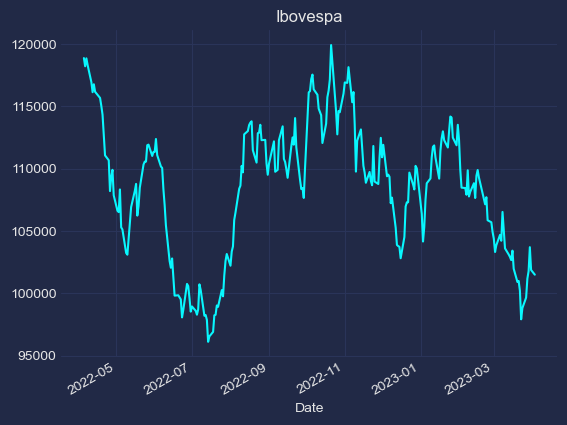

In [59]:
plt.style.use("cyberpunk")

close_data.plot(y = '^BVSP', use_index = True, legend = False)

plt.title("Ibovespa")

plt.savefig('ibovespa.png', dpi = 300)

plt.show()

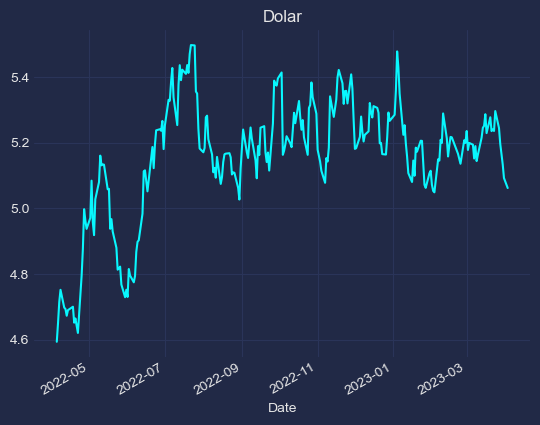

In [60]:
#plt.style.use("cyberpunk")

#close_data.plot(y = 'BRL=X', use_index = True, legend = False)

#plt.title("Dolar")

#plt.savefig('dolar.png', dpi = 300)

#plt.show()

C:\Users\Max\AppData\Local\Temp\ipykernel_1372\2646190938.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<AxesSubplot:title={'center':'^BVSP'}, xlabel='Date'>

<Figure size 640x480 with 0 Axes>

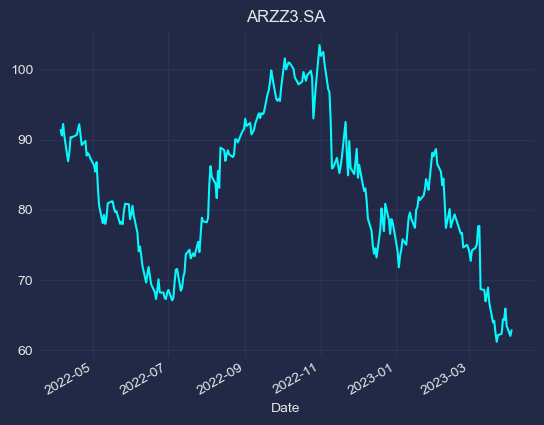

<Figure size 640x480 with 0 Axes>

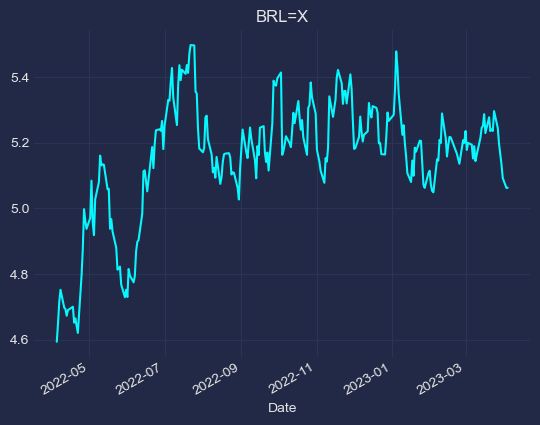

<Figure size 640x480 with 0 Axes>

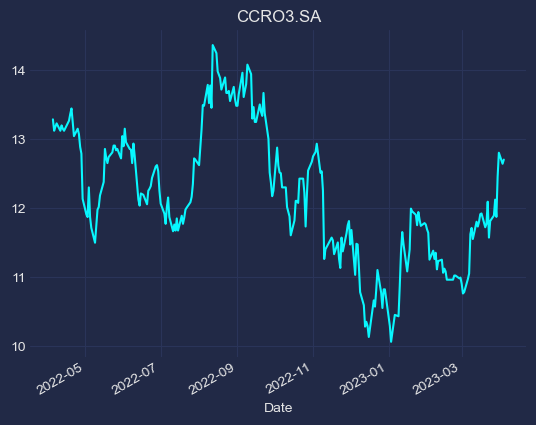

<Figure size 640x480 with 0 Axes>

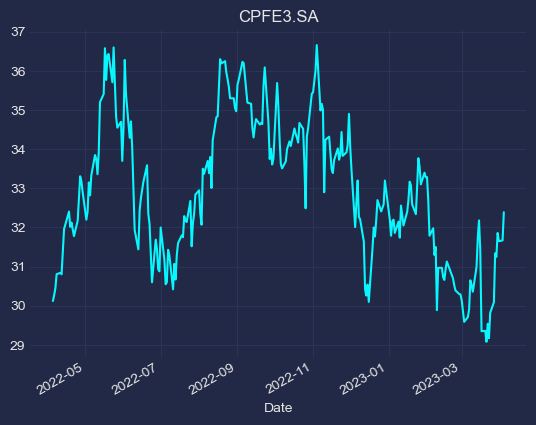

<Figure size 640x480 with 0 Axes>

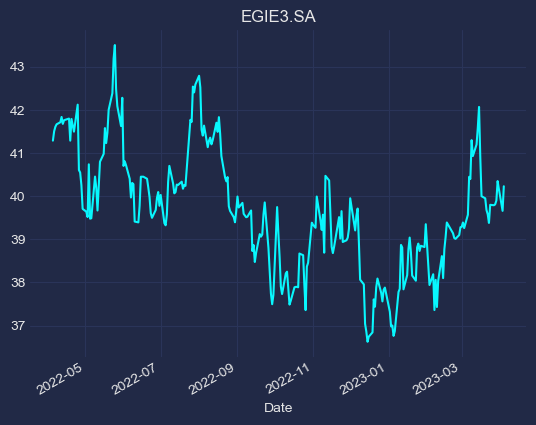

<Figure size 640x480 with 0 Axes>

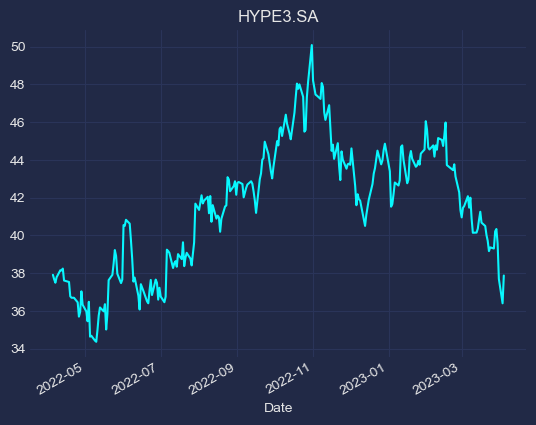

<Figure size 640x480 with 0 Axes>

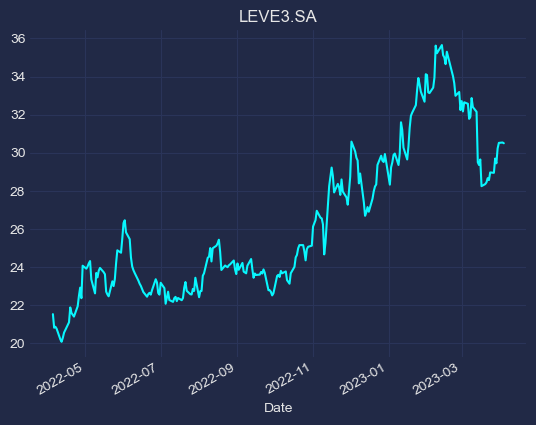

<Figure size 640x480 with 0 Axes>

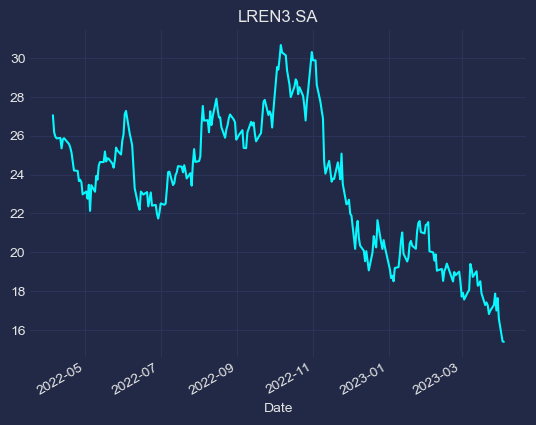

<Figure size 640x480 with 0 Axes>

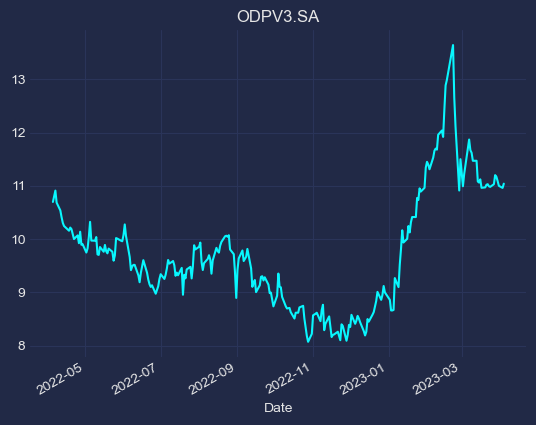

<Figure size 640x480 with 0 Axes>

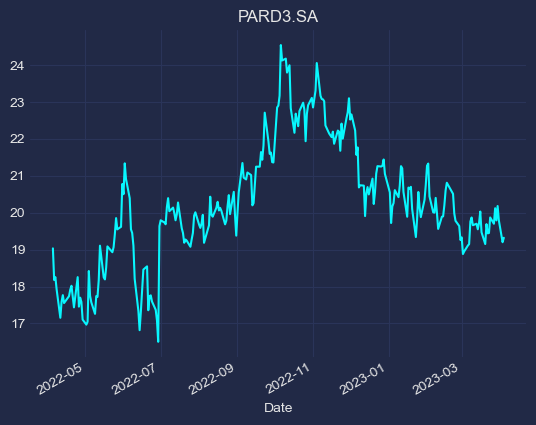

<Figure size 640x480 with 0 Axes>

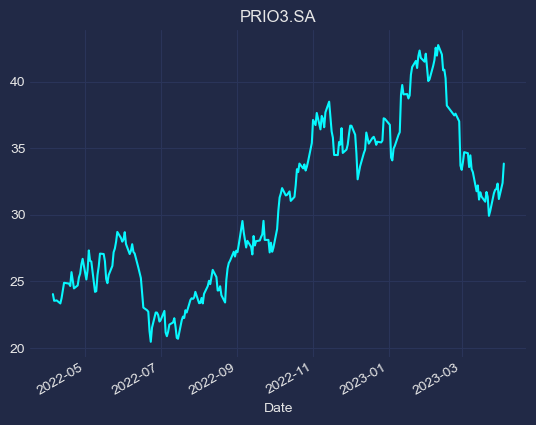

<Figure size 640x480 with 0 Axes>

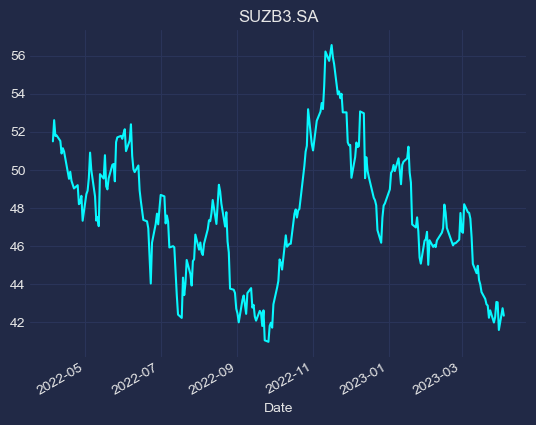

<Figure size 640x480 with 0 Axes>

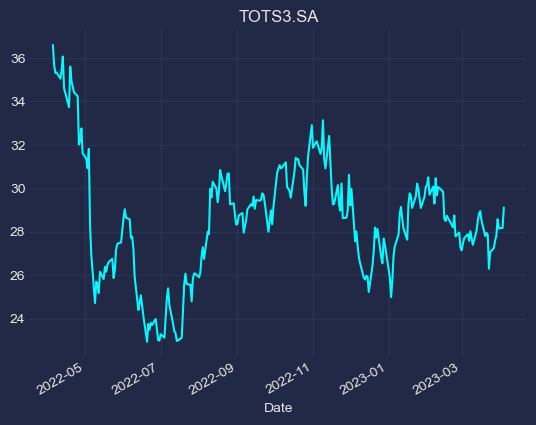

<Figure size 640x480 with 0 Axes>

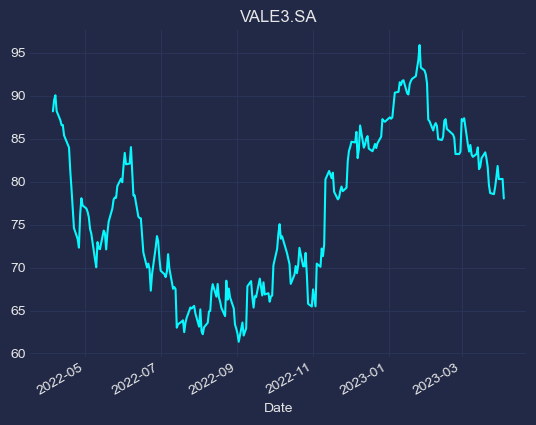

<Figure size 640x480 with 0 Axes>

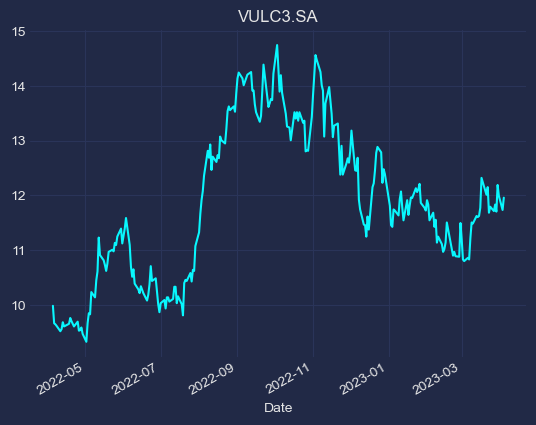

<Figure size 640x480 with 0 Axes>

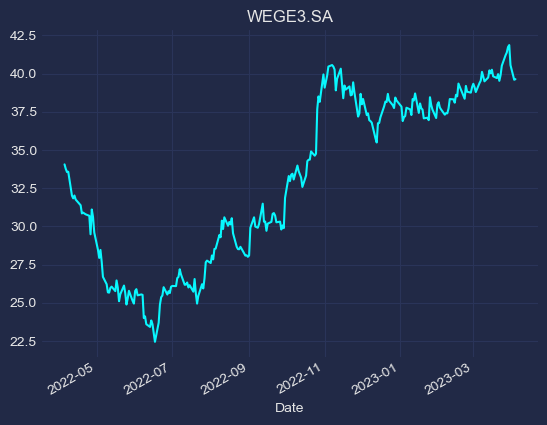

<Figure size 640x480 with 0 Axes>

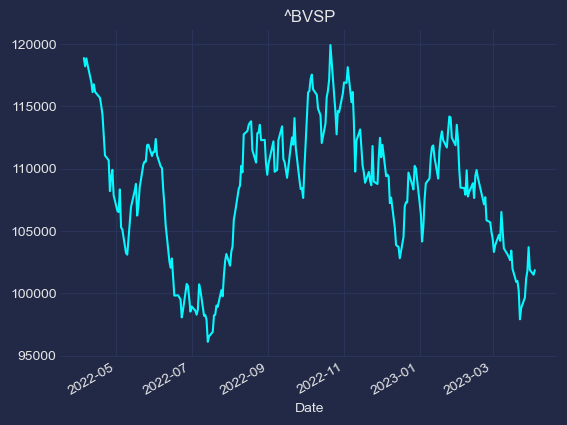

In [167]:
plt.style.use("cyberpunk")
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def plotting(L):
    """
    This function create one figure for each element of L 
    and save the figure with the name being the number of the the 
    element of L
    
    L: list with n elements (actives)
    return: n figures
    """
    C=0
    def name_fig(L):
                return str(C)
    for i in L:
        plt.figure(i)
        fig = close_data.plot(y = i , use_index = True, legend = False)
        plt.title(i)
        plt.savefig(name_fig(C), dpi = 300)
        C += 1
    return fig
plotting(active)

#plt.savefig('active.png', dpi = 300)
        
#close_data.plot(y = 'LEVE', use_index = True, legend = False)

#plt.title("LEVE")

#plt.savefig('LEVE.png', dpi = 300)

#plt.show()

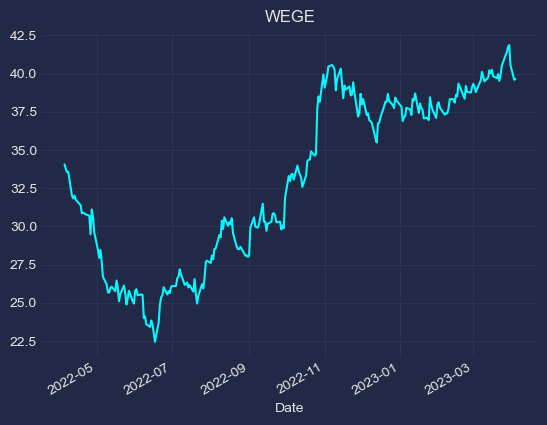

In [18]:
#plt.style.use("cyberpunk")

#close_data.plot(y = 'WEGE', use_index = True, legend = False)

#plt.title("WEGE")

#plt.savefig('WEGE.png', dpi = 300)

#plt.show()

##  Step 7: Sending the email
https://myaccount.google.com/apppasswords

In [19]:
import os
from dotenv import load_dotenv

In [20]:
load_dotenv()

True

In [21]:
senha = os.environ.get("senha")
email = 'mxxfaria@gmail.com'

In [22]:
return_year_ibovespa

-7.42

In [163]:
msg = EmailMessage()
msg['Subject'] = "Enviando email com Python"
msg["From"] = 'mxxfaria@gmail.com'
msg["To"] = 'mxxfaria@gmail.com'


msg.set_content(f'''Prezado, segue o relatório diário:

Bolsa:

No ano o Ibovespa está tendo uma rentabilidade de {Rounded_year[16]}%, 
enquanto no mês a rentabilidade é de {Rounded_month[16]}%.

No último dia útil, o fechamento do Ibovespa foi de {Rounded_day[16]}%.

Dólar:

No ano o Dólar está tendo uma rentabilidade de {Rounded_year[2]}%, 
enquanto no mês a rentabilidade é de {Rounded_month[2]}%.

No último dia útil, o fechamento do Dólar foi de {Rounded_day[2]}%.

O retorno diário para todas as ações é:{return_day_email}

Abs,
'''
)

In [157]:
with open('dolar.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='dolar.png')
    
    
with open('ibovespa.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='ibovespa.png')

In [164]:
with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    
    smtp.login(email, senha)
    smtp.send_message(msg)